In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

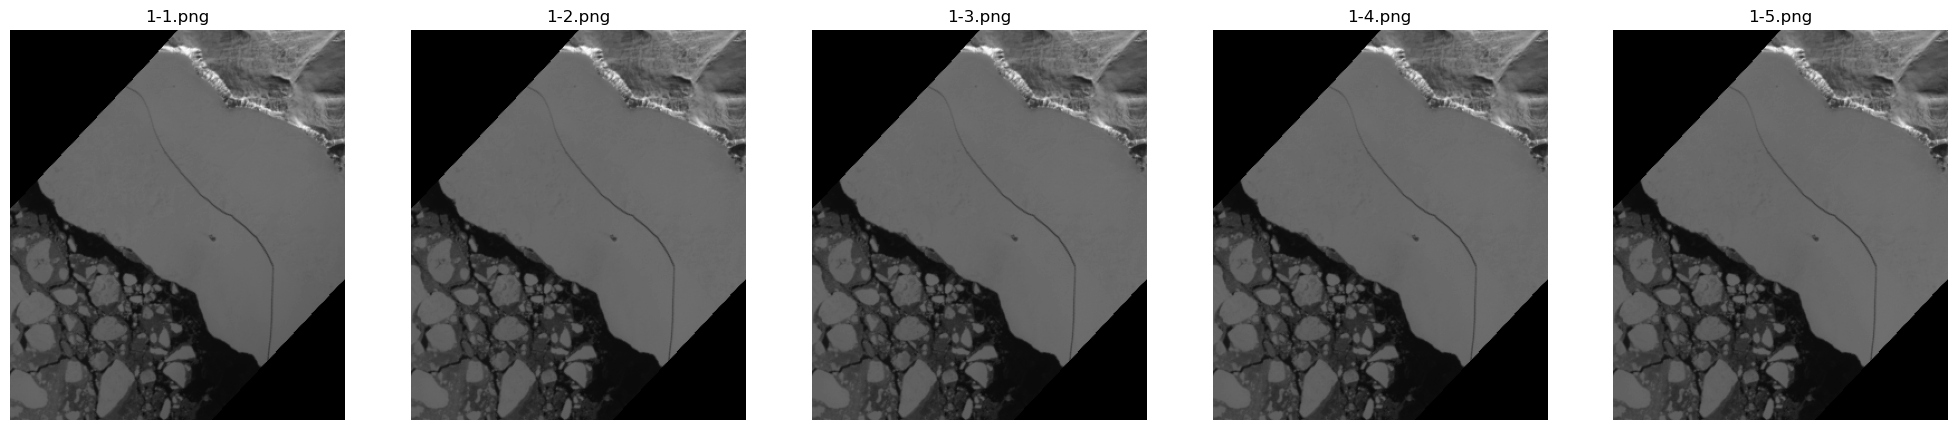

In [2]:
img = []
file = []
for i in range(1,6):
    f = '1-' + str(i) + '.png'
    file.append(f)
    temp = cv.imread(f,0)
    img.append(temp)

plt.figure(figsize=(25,20))
for i in range(0,5): 
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.title(file[i])
    plt.imshow(img[i],'gray')
    
plt.show()

In [3]:
print(np.array(img).shape)
print(type(img[0]))
h , w= img[0].shape
print(h,w)

(5, 350, 300)
<class 'numpy.ndarray'>
350 300


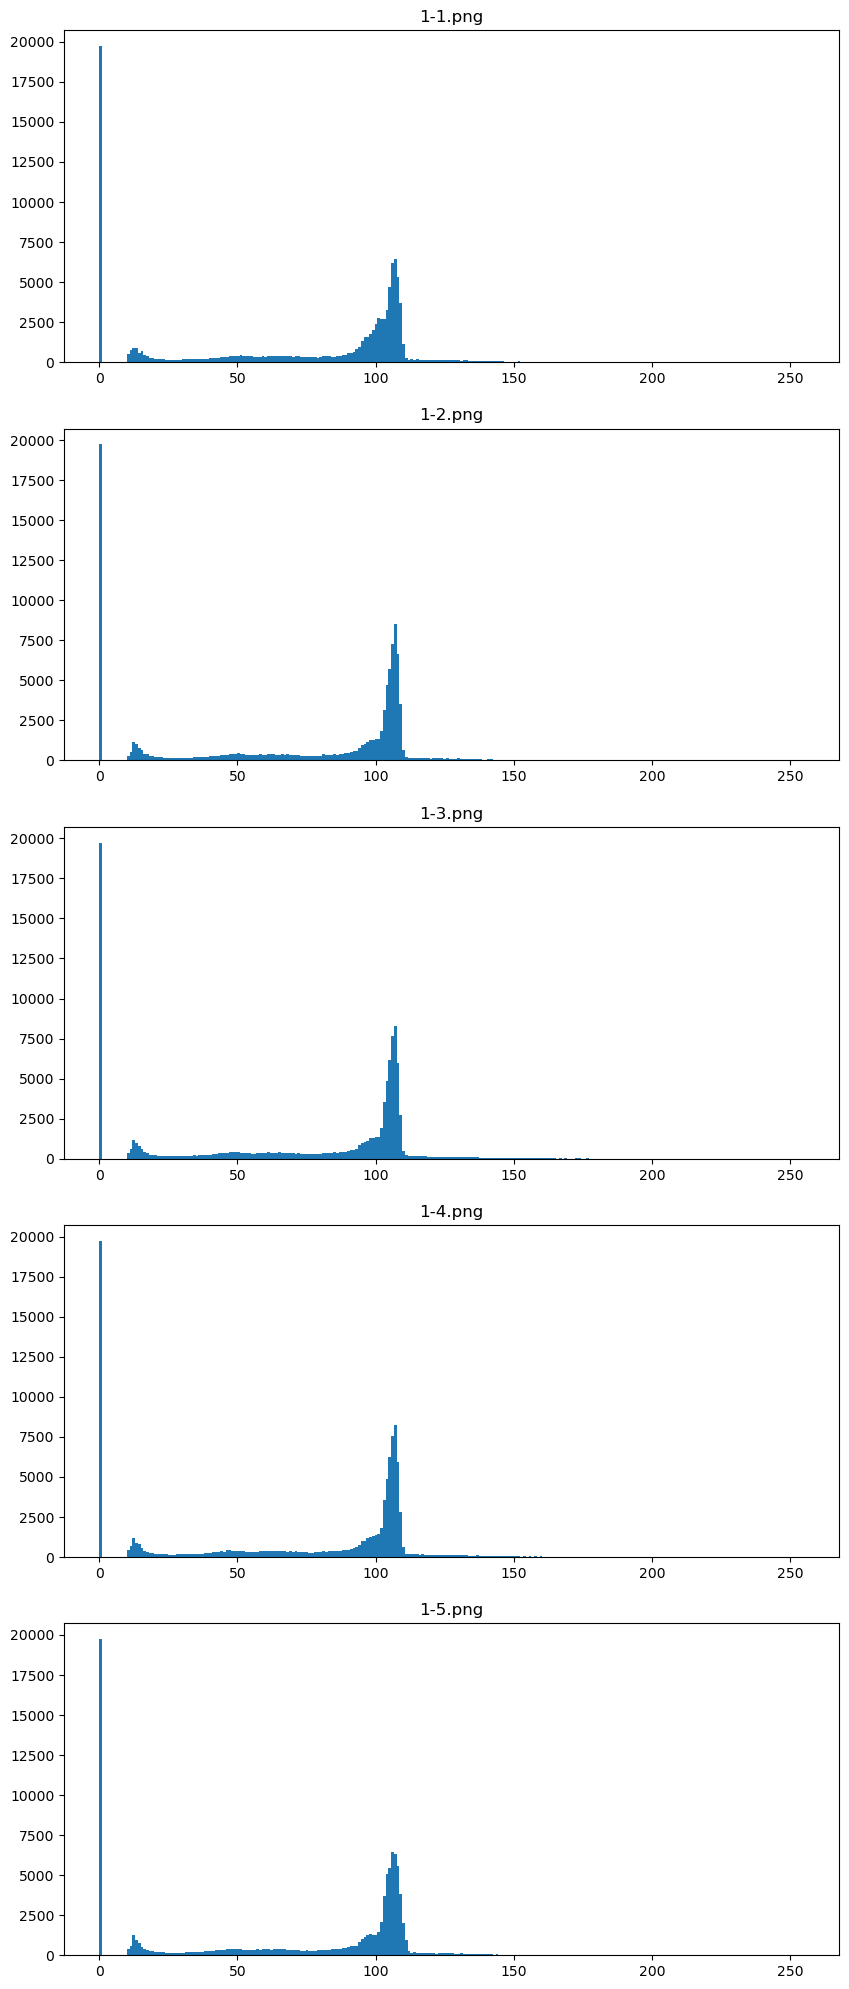

In [4]:
plt.figure(figsize=(10,25))
for i in range(0,5): 
    plt.subplot(5,1,i+1)
    plt.title(file[i])
    plt.hist(img[i].ravel(),256)
plt.show()

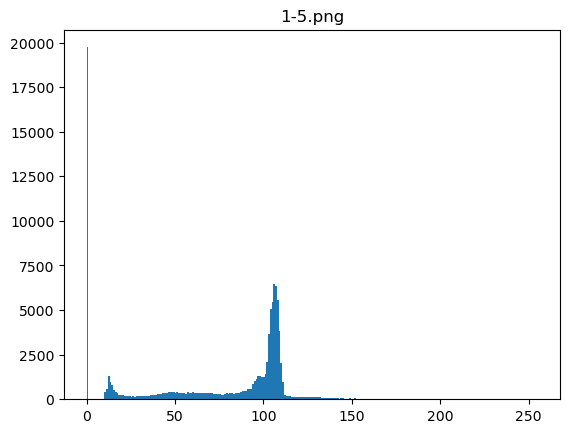

In [5]:
plt.title(file[i])
plt.hist(img[i].ravel(),256)
plt.show()

<ipython-input-16-b03b5ebf4562>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  z[i][j]=1.0 * (img[1][i][j]-img[3][i][j]) / img[2][i][j] + 1.0


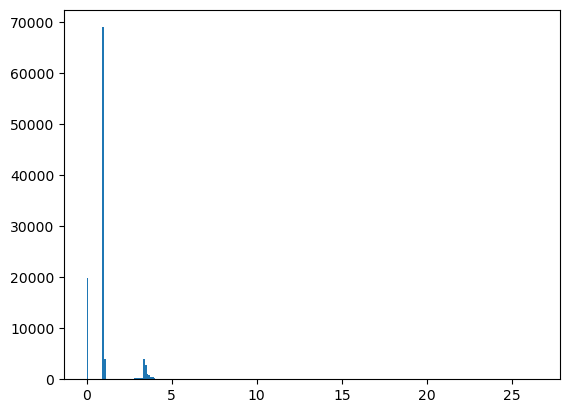

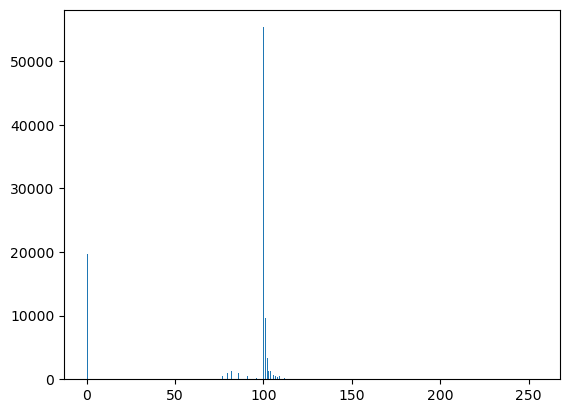

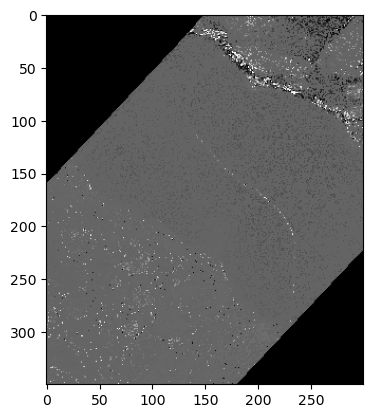

In [16]:
z = np.zeros((h,w))
for i in range(0,h):
    for j in range(0,w):
        if img[2][i][j] > 0:
           # z[i][j]=1.0 * (img[0][i][j]+img[1][i][j]-img[3][i][j]-img[4][i][j]) / img[2][i][j] + 1.0
            z[i][j]=1.0 * (img[1][i][j]-img[3][i][j]) / img[2][i][j] + 1.0
          #  z[i][j]=1.0 * (img[0][i][j]+img[1][i][j]-img[3][i][j]-img[4][i][j]) / img[2][i][j] + 1.0
           # z[i][j]=1.0 * (img[0][i][j]+img[1][i][j]-img[3][i][j]-img[4][i][j]) / img[2][i][j] + 1.0

plt.hist(z.ravel(),256)
plt.show()

#z = 1.0 * z / z.max() *255.0 
z = z * 100
z = z.astype(np.uint8)

plt.hist(z.ravel(),500)
plt.show()

plt.imshow(z,'gray')
plt.show()


uint8
255
[[ 0  0  0 ...  9  9 34]
 [ 0  0  0 ...  9  9  9]
 [ 0  0  0 ...  9  9  9]
 ...
 [ 9  9  9 ...  0  0  0]
 [ 9  9  9 ...  0  0  0]
 [ 9  9  9 ...  0  0  0]]


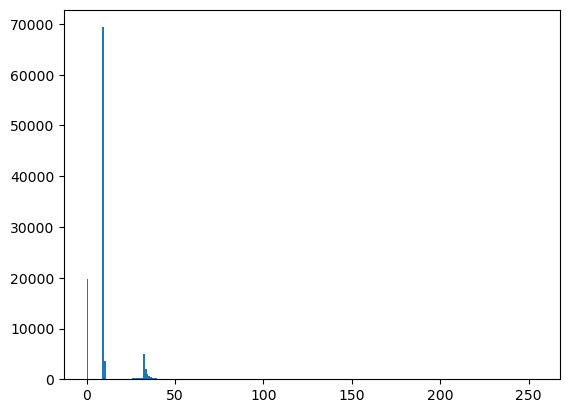

In [7]:
print(z.dtype)
z = 1.0 * z / z.max() *255.0 
z = z.astype(np.uint8)
print(z.max())
print(z)
plt.hist(z.ravel(),256)
plt.show()

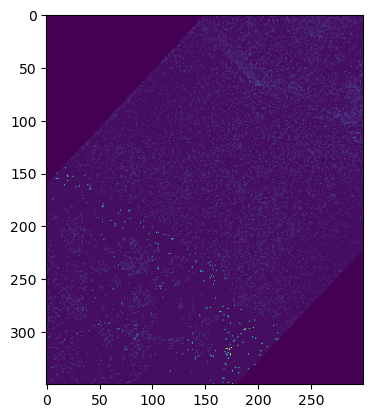

In [8]:
plt.imshow(z)
plt.show()

In [9]:
#np.set_printoptions(threshold=np.inf)
print(z)

[[ 0  0  0 ...  9  9 34]
 [ 0  0  0 ...  9  9  9]
 [ 0  0  0 ...  9  9  9]
 ...
 [ 9  9  9 ...  0  0  0]
 [ 9  9  9 ...  0  0  0]
 [ 9  9  9 ...  0  0  0]]


In [10]:
th1=0
th2=0
th3=0
th4=0
import time

start = time.perf_counter()
def ostu5layers(img):  # 显示每一个灰度级的像素数概率
    print('Processing:img')
    high, wide = (h,w)
    pixels = cv.calcHist([img], [0], None, [256], [0, 256])  # 计算每个灰度级中所含像素数，返回的是一个（256,1）的数组
    p = pixels / (high * wide)  # 获得每个灰度级中像素数占总像素数比例则我们获得了p_i的一个向量
    x=np.linspace(1,256,256) #灰度级我们定义为从0到255好像不合适这样做平均灰度级时会忽略第一个数据，所以我们定义为从1到256
    x=x.reshape(256,1)  # 这一步是因为我们需要的不是秩为1的向量，可以不加这一句输出看看shape的区别，但这样我们得到了（256,1）的灰度级向量

    maxvar=0
    cnt=0
    for k1 in range(0,50):
        for k2 in range(k1+1,50):
            for k3 in range(k2+1,50):
                for k4 in range(k3+1,50):
                    w0 = np.sum(p[0:k1])
                    w1 = np.sum(p[k1:k2])
                    w2 = np.sum(p[k2:k3])
                    w3 = np.sum(p[k3:k4])
                    w4 = np.sum(p[k4:256])  # 注意python是左闭右开np.sum(p[0:256])=1
                    
                    u0 = np.dot(x[0:k1].T, p[0:k1])
                    u1 = np.dot(x[k1:k2].T, p[k1:k2])
                    u2 = np.dot(x[k2:k3].T, p[k2:k3])
                    u3 = np.dot(x[k3:k4].T, p[k3:k4])
                    u4 = np.dot(x[k4:256].T, p[k4:256])
                    
                    W = np.array([[w0, w1, w2, w3, w4]]).T  # 注意是两层中括号，用np.array组成的向量可以转置,输出矩阵大小等等操作
                    U = np.array([[int(u0), int(u1), int(u2), int(u3), int(u4)]]).T
                    UT = np.sum(U)
                    temp = (U - UT * W) * (U - UT * W) / W
                    varbetween = np.sum(temp)
                    if varbetween>maxvar:
                        cnt=cnt+1
                        maxvar=varbetween
                        th1=k1
                        th2=k2
                        th3=k3
                        th4=k4
                        print("第"+str(cnt)+"次找到最佳阈值："+str(th1)+","+str(th2)+","+str(th3)+","+str(th4)+","+"此时类间方差为"+str(maxvar))
                        end = time.perf_counter()
                        print('Running time: %s Seconds' % (end - start))

ostu5layers(z)

Processing:img


<ipython-input-10-f0f728fc1b2b>:37: RuntimeWarning: invalid value encountered in true_divide
  temp = (U - UT * W) * (U - UT * W) / W


第1次找到最佳阈值：1,10,11,12,此时类间方差为90.25902305198275
Running time: 1.7471359000000009 Seconds
第2次找到最佳阈值：1,10,11,13,此时类间方差为90.25902305198277
Running time: 1.7472377000000003 Seconds
第3次找到最佳阈值：1,10,11,20,此时类间方差为90.40176396295524
Running time: 1.7477253999999993 Seconds
第4次找到最佳阈值：1,10,11,21,此时类间方差为90.67711115708278
Running time: 1.7485605000000009 Seconds
第5次找到最佳阈值：1,10,11,22,此时类间方差为91.09778257079965
Running time: 1.7490654999999995 Seconds
第6次找到最佳阈值：1,10,11,23,此时类间方差为91.67766818676881
Running time: 1.7493527999999996 Seconds
第7次找到最佳阈值：1,10,11,24,此时类间方差为92.44345119989974
Running time: 1.7494629000000002 Seconds
第8次找到最佳阈值：1,10,11,25,此时类间方差为93.60829351793596
Running time: 1.7495631999999999 Seconds
第9次找到最佳阈值：1,10,11,26,此时类间方差为95.20415107774744
Running time: 1.7501357000000004 Seconds
第10次找到最佳阈值：1,10,11,27,此时类间方差为97.09070747501265
Running time: 1.7502544000000002 Seconds
第11次找到最佳阈值：1,10,11,28,此时类间方差为100.1561098250735
Running time: 1.7503601000000009 Seconds
第12次找到最佳阈值：1,10,11,29,此时类间方差为103.71312719

In [11]:
#ostu5layers(img)
th1,th2,th3,th4=(1,10,31,49)
print('th1=',th1)
print('th2=',th2)
print('th3=',th3)
print('th4=',th4)


th1= 1
th2= 10
th3= 31
th4= 49


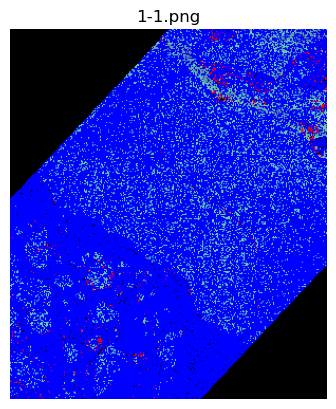

In [15]:
#th1,th2,th3,th4=(1,25,75,114)
th1,th2,th3,th4=(1,10,28,36)
color1 = [0,0,0]     #黑色无用区域
color2 = [0,0,255]  #蓝色 海水
color3 = [95,158,160]   #色 薄冰
color4 = [102,205,170]   # 厚冰
color5 = [255,0,0]  #红色 陆地
#手工设置阈值点
# th1 = 5
# th2 = 35
# th3 = 90
# th4 = 120
img1 = np.zeros((5, 350, 300,3),dtype=np.uint8)

for row in range(0,h):
    for col in range(0,w):
#         if z[row][col]<=th1:
#             img1[0,row, col]=color1
#         elif z[row][col]>th1 and z[row][col]<=th2:
#             img1[0,row, col] =color2
#         elif z[row][col]>th2 and z[row][col]<=th3:
#             img1[0,row, col] = color3
#         elif z[row][col]>th3 and z[row][col]<=th4:
#             img1[0,row, col] = color4
#         elif z[row][col]>th4:
#             img1[0,row, col] = color5
        if z[row][col]==0:
            img1[0,row, col]=color1
        elif z[row][col]==1:
            img1[0,row, col] =color2
        elif z[row][col]==2:
            img1[0,row, col] = color3
        elif z[row][col]==3:
            img1[0,row, col] = color4
        elif z[row][col]==4:
            img1[0,row, col] = color5

plt.axis('off')
plt.title(file[0])
plt.imshow(img1[0])
plt.show()